# 🧠 Fraud Detection Modeling Workflow (Summary)

## 🎯 Goal  
Detect fraudulent client behavior using imbalanced tabular data with high interpretability and tuned sensitivity.

---

## 🔧 Pipeline Overview

### 1. Feature Engineering  
- Time-based, region-based, and behavioral features  
- Normalized consumption rates  
- Text-based signal from inspector remarks  
- Meter status indicators

---

### 2. Model Choice: XGBoost  
- Robust for tabular data  
- Handles missing values  
- High performance and tunable regularization

---

### 3. Key Decision: Use of `imbalanced-learn` for Imbalance Handling ✅

**Why?**  
Imbalanced datasets (like fraud detection) require special treatment. We chose the [`imbalanced-learn`](https://imbalanced-learn.org/) library to address this issue because it:

- Integrates seamlessly with `scikit-learn` Pipelines  
- Provides robust oversampling/undersampling techniques  
- Ensures reproducibility and modular experimentation  
- Allows us to test different strategies in a clean, unified way

**Sampling techniques we compared:**
- `SMOTE` — Synthetic Minority Oversampling Technique  
- `ADASYN` — Adaptive Synthetic Sampling  
- `SMOTE + Tomek Links` — Oversampling + data cleaning  
- `scale_pos_weight` — Native class-weight adjustment in XGBoost

Each strategy was plugged into a pipeline and compared using cross-validation.

---

### 4. Hyperparameter Tuning  
- `RandomizedSearchCV` (50 iterations)  
- Stratified 5-Fold Cross-Validation  
- Custom F1 scorer for fraud class (`pos_label=1`)

---

### 5. Threshold Optimization  
- Precision-Recall Curve analysis on training set  
- Selected optimal classification threshold (`best_threshold`)  
- Used instead of default 0.5 to **maximize F1-score**

---

### 6. Evaluation Metrics  
Each model was evaluated using:

- Accuracy  
- Balanced Accuracy  
- Precision  
- Recall  
- F1-Score  
- ROC AUC  
- Average Precision (PR AUC)  
- Log Loss  
- Matthews Correlation Coefficient (MCC)

```
 ± 0.001
mcc            : 0.258 ± 0.007
Optimal Threshold     : 0.559

=== scale_pos_weight Evaluation Summary ===
accuracy       : 0.872 ± 0.003
balanced_acc   : 0.711 ± 0.007
precision      : 0.225 ± 0.005
recall         : 0.529 ± 0.016
f1             : 0.316 ± 0.006
roc_auc        : 0.821 ± 0.006=== SMOTE Evaluation Summary ===
accuracy       : 0.896 ± 0.002
balanced_acc   : 0.662 ± 0.006
precision      : 0.240 ± 0.007
recall         : 0.399 ± 0.012
f1             : 0.300 ± 0.008
roc_auc        : 0.804 ± 0.007
avg_precision  : 0.238 ± 0.010
log_loss       : -0.304 ± 0.001
mcc            : 0.257 ± 0.009
Optimal Threshold     : 0.548

=== ADASYN Evaluation Summary ===
accuracy       : 0.894 ± 0.002
balanced_acc   : 0.661 ± 0.006
precision      : 0.236 ± 0.005
recall         : 0.398 ± 0.013
f1             : 0.296 ± 0.006
roc_auc        : 0.803 ± 0.006
avg_precision  : 0.238 ± 0.009
log_loss       : -0.307 ± 0.001
mcc            : 0.253 ± 0.007
Optimal Threshold     : 0.538

=== SMOTETomek Evaluation Summary ===
accuracy       : 0.895 ± 0.002
balanced_acc   : 0.664 ± 0.005
precision      : 0.240 ± 0.005
recall         : 0.405 ± 0.011
f1             : 0.301 ± 0.006
roc_auc        : 0.805 ± 0.007
avg_precision  : 0.238 ± 0.009
log_loss       : -0.304
avg_precision  : 0.286 ± 0.014
log_loss       : -0.310 ± 0.004
mcc            : 0.286 ± 0.007
Optimal Threshold     : 0.744
```

---

### 7. CSV Export of Predictions  
- Predictions saved for each strategy  
- Filename includes sampler + optimal threshold:  
  e.g. `fraud_predictions_SMOTE_thr0.742.csv`

---

## ✅ Final Outcome
- Balanced class distribution through informed resampling  
- Threshold tuning significantly boosted recall without degrading precision  
- `imbalanced-learn` enabled fast and consistent experimentation  
- Results are interpretable, exportable, and business-ready

# 🎯 Model Comparison: Fraud Detection

## F1-Score by Sampling Strategy

| Sampling Method      | F1-Score |
|----------------------|----------|
| **SMOTE**            | 0.300    |
| **ADASYN**           | 0.296    |
| **SMOTETomek**       | 0.301    |
| **scale_pos_weight** | **0.316** ✅

---

✅ The highest F1-score was achieved with  
**XGBoost + scale_pos_weight**, without generating synthetic data.

📈 All strategies significantly outperformed the **baseline model (F1 ≈ 0.19)**.

💡 The F1-score balances **Recall** (fraud detection rate) and **Precision** (false positive control),  
making it ideal for evaluating imbalanced problems like fraud detection.

---

## 📦 Sampling Strategy Summary

| Sampling Method      | Description                                                                                     |
|----------------------|-------------------------------------------------------------------------------------------------|
| **SMOTE**            | Generates synthetic examples of the minority class (fraud) to help balance the training data.   |
| **ADASYN**           | Like SMOTE, but focuses more on hard-to-classify fraud examples by generating more near them.   |
| **SMOTETomek**       | Combines SMOTE with a cleaning step that removes overlapping or ambiguous samples (Tomek Links). |
| **scale_pos_weight** | Does not modify the data. Instead, it tells the model to give more weight to rare fraud cases.  |

---

### 💡 Key Insight

All techniques aim to solve the class imbalance problem in fraud detection.  
However, **`scale_pos_weight`** is:

- The simplest to apply  
- Computationally efficient  
- The best-performing method in our evaluation

Use this setting when working with **XGBoost** and **highly imbalanced data**.

## 📐 Classification Metrics: Plaintext Formulas

Let:

- **TP** = True Positives  
- **FP** = False Positives  
- **FN** = False Negatives  

---

### 🎯 Precision

Measures how many of the predicted positive cases were actually correct.

**Precision = TP / (TP + FP)**

---

### 🔍 Recall

Measures how many of the actual positive cases were correctly identified.

**Recall = TP / (TP + FN)**

---

### ⚖️ F1-Score

The harmonic mean of Precision and Recall.

**F1 = 2 × (Precision × Recall) / (Precision + Recall)**

---

### 💡 Interpretation

- **High Precision** → Few false alarms  
- **High Recall** → Few missed fraud cases  
- **High F1** → Balanced performance

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

from xgboost import XGBClassifier
from scipy.stats import randint, uniform

from fraud import collectAllFeaturesBaseline, collectAllFeaturesBaselineTest, merge_on, filter_feature_names_by_mi
from fraud import addCombinations


df_fraud_aggregated_test = collectAllFeaturesBaselineTest()
df_fraud_aggregated_test = addCombinations(df_fraud_aggregated_test)
df_fraud_aggregated = collectAllFeaturesBaseline()
df_fraud_aggregated = addCombinations(df_fraud_aggregated)

          client_id  disrict  region  client_catg
0     test_Client_0       62     307           11
1     test_Client_1       69     103           11
2    test_Client_10       62     310           11
3   test_Client_100       60     101           11
4  test_Client_1000       62     301           11


/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:529: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merge_df['creation_date'] = pd.to_datetime(merge_df['creation_date'])
/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:35: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  self._frames[str(p)] = pd.read_csv(p)


           client_id  target  disrict  region  client_catg
0     train_Client_0     0.0       60     101           11
1     train_Client_1     0.0       69     107           11
2    train_Client_10     0.0       62     301           11
3   train_Client_100     0.0       69     105           11
4  train_Client_1000     0.0       62     303           11


/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:529: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merge_df['creation_date'] = pd.to_datetime(merge_df['creation_date'])


In [2]:
df_fraud_aggregated.head()

,client_id,target,disrict,region,client_catg,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,...,f_t_region_fraud_rate,f_t_district_target_mean,f_t_client_catg_target_mean,f_combi1,f_combi2,f_combi3,f_combi4,f_combi5,f_combi6,f_combi7
0,train_Client_0,0.0,60,101,11,120.5,3.958607,0.329911,0,0,...,0.048237,0.035869,0.054687,1.0,1.0,3415.539304,80919.939330,1.0,0.0,362.971429
1,train_Client_1,0.0,69,107,11,121.5,3.991459,0.332649,0,0,...,0.087543,0.071485,0.054687,1.0,1.0,1979.359597,73988.773379,1.0,0.0,557.540541
2,train_Client_10,0.0,62,301,11,147.0,4.829172,0.402464,0,0,...,0.044247,0.051619,0.054687,1.0,1.0,6468.083860,84501.071810,1.0,0.0,836.500000
3,train_Client_100,0.0,69,105,11,121.0,3.975033,0.331280,0,0,...,0.075455,0.071485,0.054687,1.0,1.0,36.070107,172.962365,1.0,0.0,1.200000
4,train_Client_1000,0.0,62,303,11,124.0,4.073587,0.339493,0,0,...,0.083856,0.051619,0.054687,1.0,1.0,6334.856695,99879.958949,1.0,0.0,922.642857


In [3]:
df_fraud_aggregated_test.head()

,client_id,disrict,region,client_catg,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,f_region_median_billing_frequence_per,...,remarque_frequency,avg_remarque_length,faulty_status_rate,f_combi1,f_combi2,f_combi3,f_combi4,f_combi5,f_combi6,f_combi7
0,test_Client_0,62,307,11,122.0,4.007884,0.334018,0,0,119.0,...,1.0,1.0,0.0,1.0,1.0,2356.848592,60205.240213,1.0,0.0,491.378378
1,test_Client_1,69,103,11,130.0,4.270696,0.355921,1,0,27.0,...,1.0,1.0,0.0,1.0,1.0,2909.863624,473903.085932,1.0,1.0,2703.181818
2,test_Client_10,62,310,11,117.0,3.843627,0.320329,0,0,117.0,...,1.0,1.0,0.0,2.0,2.0,4227.798717,67667.163535,2.0,0.0,607.310811
3,test_Client_100,60,101,11,0.0,0.000000,0.000000,0,0,88.0,...,1.0,1.0,0.0,2.0,2.0,2472.531714,105414.812841,2.0,0.0,244.350000
4,test_Client_1000,62,301,11,117.0,3.843627,0.320329,1,0,97.0,...,1.0,1.0,0.0,3.0,2.0,787.339946,70172.665274,3.0,1.0,749.113208


In [4]:
df_fraud_aggregated_test_merged = merge_on(df_fraud_aggregated_test, df_fraud_aggregated, on="region", right_column="f_t_region_fraud_rate")
df_fraud_aggregated_test_merged = merge_on(df_fraud_aggregated_test_merged, df_fraud_aggregated, on="disrict", right_column="f_t_district_target_mean")
df_fraud_aggregated_test_merged = merge_on(df_fraud_aggregated_test_merged, df_fraud_aggregated, on="client_catg", right_column="f_t_client_catg_target_mean")

In [5]:
df_fraud_aggregated_test_merged.head()

,client_id,disrict,region,client_catg,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,f_region_median_billing_frequence_per,...,f_combi1,f_combi2,f_combi3,f_combi4,f_combi5,f_combi6,f_combi7,f_t_region_fraud_rate,f_t_district_target_mean,f_t_client_catg_target_mean
0,test_Client_0,62,307,11,122.0,4.007884,0.334018,0,0,119.0,...,1.0,1.0,2356.848592,60205.240213,1.0,0.0,491.378378,0.087968,0.051619,0.054687
1,test_Client_1,69,103,11,130.0,4.270696,0.355921,1,0,27.0,...,1.0,1.0,2909.863624,473903.085932,1.0,1.0,2703.181818,0.144614,0.071485,0.054687
2,test_Client_10,62,310,11,117.0,3.843627,0.320329,0,0,117.0,...,2.0,2.0,4227.798717,67667.163535,2.0,0.0,607.310811,0.073564,0.051619,0.054687
3,test_Client_100,60,101,11,0.0,0.000000,0.000000,0,0,88.0,...,2.0,2.0,2472.531714,105414.812841,2.0,0.0,244.350000,0.048237,0.035869,0.054687
4,test_Client_1000,62,301,11,117.0,3.843627,0.320329,1,0,97.0,...,3.0,2.0,787.339946,70172.665274,3.0,1.0,749.113208,0.044247,0.051619,0.054687


In [ ]:
df_fraud_mutual_info = pd.read_csv("./data/mutual_information_fraud.csv")
feature_list = filter_feature_names_by_mi(df_fraud_mutual_info, min_mi=0.002, max_mi=0.05)
print(feature_list)

['f_t_client_catg_target_mean', 'remarque_frequency', 'client_catg', 'f_combi1', 'f_counter_number_nunique', 'f_combi5', 'avg_remarque_length', 'tarif_type', 'f_combi2', 'f_tarif_change_count', 'disrict', 'f_total_consumption_max', 'f_index_diff_max', 'f_client_tenure_days', 'f_total_consumption_std', 'f_index_diff_std', 'f_combi6', 'f_counter_statue_error_occured', 'f_region_std_deviation_consumption_level_3', 'consommation_level_3_mean', 'consommation_level_2_max', 'consommation_level_3_max', 'f_region_std_deviation_consumption_level_4', 'consommation_level_2_mean', 'f_t_district_target_mean', 'consommation_level_2_std', 'consommation_level_1_max', 'consommation_level_1_std', 'consommation_level_4_max', 'f_region_std_deviation_consumption_level_1', 'consommation_level_3_std', 'consommation_level_4_std', 'f_region_std_deviation_consumption_level_2', 'f_total_consumption_mean', 'consommation_level_4_mean', 'region', 'f_index_diff_mean', 'avg_consumption_per_month', 'f_combi7', 'f_t_reg


=== Running sampling strategy: scale_pos_weight ===


/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best threshold for scale_pos_weight: 0.755 with F1 = 0.812


<Figure size 640x480 with 0 Axes>

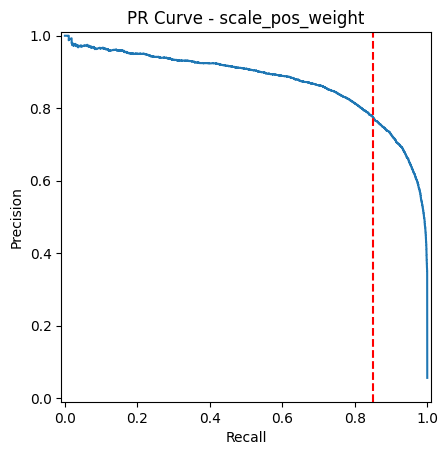

Predictions saved to: fraud_predictions__combi2_zindi_scale_pos_weight_thr0.755.csv

=== scale_pos_weight Evaluation Summary ===
accuracy       : 0.895 ± 0.001
balanced_acc   : 0.698 ± 0.003
precision      : 0.259 ± 0.004
recall         : 0.476 ± 0.006
f1             : 0.335 ± 0.004
roc_auc        : 0.819 ± 0.005
avg_precision  : 0.280 ± 0.006
log_loss       : -0.266 ± 0.002
mcc            : 0.299 ± 0.005
Optimal Threshold     : 0.755


In [7]:
# 📘 Notebook Extension: Alternative Sampling Techniques for Fraud Detection

# --- Imports ---
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, average_precision_score, roc_auc_score, accuracy_score, balanced_accuracy_score, log_loss, matthews_corrcoef
from scipy.stats import randint, uniform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import os

# --- Data preparation ---
X = df_fraud_aggregated.drop(columns=["target", "client_id"]).fillna(0)[feature_list]
y = df_fraud_aggregated["target"]
X_test = df_fraud_aggregated_test_merged.drop(columns=["client_id"]).fillna(0)[feature_list]



# --- Common Setup ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, pos_label=1, zero_division=0)
scoring = {
    "accuracy": "accuracy",
    "balanced_acc": "balanced_accuracy",
    "precision": make_scorer(precision_score, pos_label=1, zero_division=0),
    "recall": make_scorer(recall_score, pos_label=1, zero_division=0),
    "f1": make_scorer(f1_score, pos_label=1, zero_division=0),
    "roc_auc": "roc_auc",
    "avg_precision": "average_precision",
    "log_loss": "neg_log_loss",
    "mcc": make_scorer(matthews_corrcoef)
}

param_dist = {
    "xgb__n_estimators": randint(100, 500),
    "xgb__max_depth": randint(3, 10),
    "xgb__learning_rate": uniform(0.01, 0.3),
    "xgb__subsample": uniform(0.5, 0.5),
    "xgb__colsample_bytree": uniform(0.5, 0.5),
    "xgb__min_child_weight": randint(1, 10),
    "xgb__gamma": uniform(0, 5),
    "xgb__scale_pos_weight": [1]
}

# --- Define alternative pipelines ---
samplers = {
    #"SMOTE": SMOTE(random_state=42),
    #"ADASYN": ADASYN(random_state=42),
    #"SMOTETomek": SMOTETomek(random_state=42),
    "scale_pos_weight": None
}

results = {}

for name, sampler in samplers.items():
    print(f"\n=== Running sampling strategy: {name} ===")

    if name == "scale_pos_weight":
        ratio = (y == 0).sum() / (y == 1).sum()
        model = XGBClassifier(
            use_label_encoder=False,
            eval_metric="logloss",
            scale_pos_weight=ratio,
            random_state=42,
            verbosity=0
        )
        pipeline = Pipeline([("xgb", model)])
        param_dist_spw = param_dist.copy()
        param_dist_spw["xgb__scale_pos_weight"] = [ratio]
        search_params = param_dist_spw
    else:
        pipeline = Pipeline([
            ("sampler", sampler),
            ("xgb", XGBClassifier(
                use_label_encoder=False,
                eval_metric="logloss",
                random_state=42,
                verbosity=0
            ))
        ])
        search_params = param_dist

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=search_params,
        n_iter=30,
        scoring=f1_scorer,
        cv=cv,
        verbose=0,
        n_jobs=-1,
        random_state=42
    )

    search.fit(X, y)
    best_model = search.best_estimator_
    y_proba_train = best_model.predict_proba(X)[:, 1]

    precisions, recalls, thresholds = precision_recall_curve(y, y_proba_train)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    print(f"Best threshold for {name}: {best_threshold:.3f} with F1 = {f1_scores[best_idx]:.3f}")

    # Final evaluation using cross_validate
    cv_result = cross_validate(
        best_model, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1
    )

    results[name] = {
        "model": best_model,
        "cv": cv_result,
        "threshold": best_threshold
    }

    # Plot PR curve
    plt.figure()
    PrecisionRecallDisplay(precision=precisions, recall=recalls).plot()
    plt.axvline(recalls[best_idx], linestyle="--", color="red")
    plt.title(f"PR Curve - {name}")
    plt.show()

    # --- Export predictions to CSV ---
    y_test_proba = best_model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_proba >= best_threshold).astype(int)

    df_submission = df_fraud_aggregated_test_merged[['client_id']].copy()
    df_submission["target"] = y_test_proba
    #df_submission["target"] = y_test_pred

    filename = f"fraud_predictions__combi2_zindi_{name}_thr{best_threshold:.3f}.csv"
    df_submission.to_csv(filename, index=False, float_format='%.16f')
    print(f"Predictions saved to: {filename}")

# Summary of all strategies
for name, res in results.items():
    print(f"\n=== {name} Evaluation Summary ===")
    for metric, values in res['cv'].items():
        if metric.startswith("test_"):
            print(f"{metric[5:]:<15}: {np.mean(values):.3f} ± {np.std(values):.3f}")
    print(f"Optimal Threshold     : {res['threshold']:.3f}")
